In [1]:
import numpy as np
import matplotlib.pyplot as plt 

1. Go to http://astroweb.cwru.edu/SPARC/ and under "BASIC SPARK DATA", download the zip file for "Newtonian Mass Models".
2. Open (extract/unzip) the zip file and choose a galaxy (any file) of your choice. Do not rename the file. Put the name of the chosen galaxy in the variable in the cell below and run it.

In [2]:
Your_Galaxy='NGC0891' #for example: NGC0891

3. Make a note of the directory (file location) of the SPARC file of your galaxy **with respect to this location of this python notebook**. For example, if your file is located in the same location as this code, leave the following cell as is. But if it is, say, in the next folder "up" from this one, use the extension '../'. So an example of if the SPARC file is located two folders then one folder "down" (into a different folder named, say, 'otherfolder'), you would write:
`SPARC_file_directory='../../otherfolder/'` in the cell below and run it.

In [3]:
SPARC_file_directory='sparc/NewtonianMassModels/'                       #note that '' means the string variable is blank

In [4]:
# Define file path for .dat files
SPARC_File_Path = SPARC_file_directory + Your_Galaxy + '_rotmod.dat'

data = np.loadtxt(SPARC_File_Path)                      # Load data, skips the header
Rad,Vobs,errV,Vgas,Vdisk,Vbul,SBdisk,SBbul = data.T     # Split columns into arrays
print(Rad)

# Define distance in Mpc
firstline = open(SPARC_File_Path).readline()
firstline = firstline.split()
distance = float(firstline[3])

# Print header
for lines in open(SPARC_File_Path, 'r'):
    if lines.startswith('#'):
        print(lines)

[ 0.92  2.32  3.24  4.17  5.1   6.03  6.96  7.89  8.8   9.73 10.64 11.58
 12.52 13.46 14.4  15.33 16.27 17.11]
# Distance = 9.91 Mpc

# Rad	Vobs	errV	Vgas	Vdisk	Vbul	SBdisk	SBbul		

# kpc	km/s	km/s	km/s	km/s	km/s	L/pc^2	L/pc^2



## Plot observed velocity

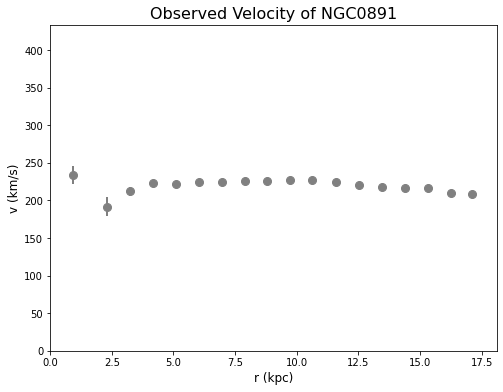

In [5]:
plt.figure(figsize=(8,6))
plt.errorbar(Rad,Vobs,yerr=errV, marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', linewidth=2)
plt.xlabel('r (kpc)',size=12)
plt.ylabel('v (km/s)',size=12)
plt.title(str('Observed Velocity of ' + Your_Galaxy), size=16)
plt.xlim(0,np.max(Rad + 1))
plt.ylim(0,np.max(Vobs + 200))
plt.show()

## Plot velocity of each component

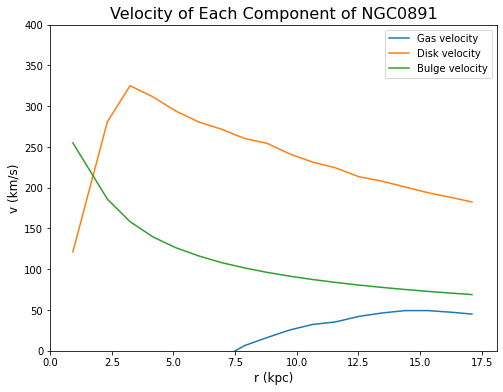

In [6]:
plt.figure(figsize=(8,6))
plt.plot(Rad,Vgas, label="Gas velocity")
plt.plot(Rad,Vdisk, label="Disk velocity")
plt.plot(Rad,Vbul, label="Bulge velocity")
plt.xlabel('r (kpc)',size=12)
plt.ylabel('v (km/s)',size=12)
plt.title(str('Velocity of Each Component of ' + Your_Galaxy), size=16)
plt.xlim(0,np.max(Rad + 1))
plt.ylim(0,400)
plt.legend()
plt.show()

## Total curve

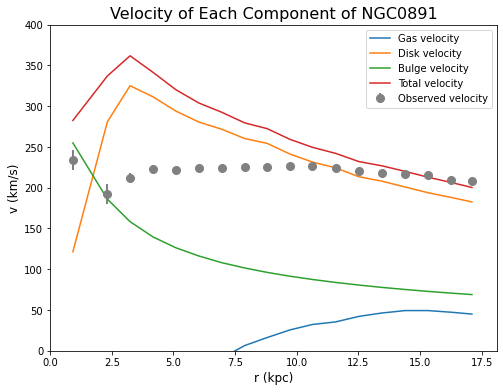

In [7]:
totalvelocity = np.sqrt(Vgas**2 + Vdisk**2 + Vbul**2)

plt.figure(figsize=(8,6))
plt.plot(Rad,Vgas, label="Gas velocity")
plt.plot(Rad,Vdisk, label="Disk velocity")
plt.plot(Rad,Vbul, label="Bulge velocity")
plt.plot(Rad,totalvelocity, label="Total velocity")
plt.errorbar(Rad,Vobs,yerr=errV, marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', linewidth=2, label = "Observed velocity")
plt.xlabel('r (kpc)',size=12)
plt.ylabel('v (km/s)',size=12)
plt.title(str('Velocity of Each Component of ' + Your_Galaxy), size=16)
plt.xlim(0,np.max(Rad + 1))
plt.ylim(0,400)
plt.legend()
plt.show()